In [ ]:
# examine FP rate across different coverage

[1.34986653e-06 9.89902121e-07 8.99911019e-07 8.99911019e-07
 8.99911019e-07 8.99911019e-07 8.99911019e-07 8.32417693e-07
 7.42426591e-07 6.07439938e-07 3.37466632e-07 6.74933264e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[1.79982204e-06 1.25987543e-06 1.05739545e-06 9.67404345e-07
 9.22408795e-07 1.01239990e-06 1.10239100e-06 7.87422142e-07
 3.37466632e-07 2.24977755e-08 1.12488877e-07 2.02479979e-07
 2.24977755e-07 2.24977755e-07 2.02479979e-07 1.12488877e-07
 2.24977755e-08 1.34986653e-07 3.14968857e-07 4.04959959e-07
 2.24977755e-07 4.49955510e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000

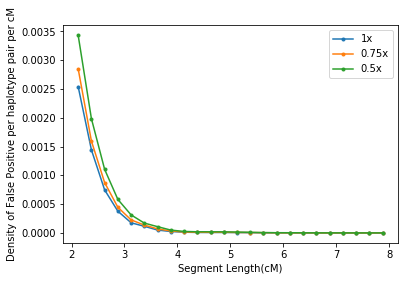

In [11]:
from utility import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
import pickle

step = 0.25
bins = np.arange(2, 25, step)
binmidpoint = (bins[1:]+bins[:-1])/2
npairs = 200*199/2
cov2label={'cov1':'1x', 'cov3over4':'0.75x', 'cov1over2':'0.5x'}

for cov in ['cov1', 'cov3over4', 'cov1over2']:
    data = pd.read_csv(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim/calledIBD/{cov}/ch3_0.0cm/ibd.summary.csv', sep=',')
    fps = np.array(data['lengthM'])
    fps = 100*np.array(fps) # convert to cM 
    y, _ = np.histogram(fps, bins=bins)
    y = y/(4*223.361*step*npairs) # convert to rate per haplotype pairs, per centiMorgan
    #plt.plot(binmidpoint, y)
    #y_smoothed = gaussian_filter1d(y, 2)
    f = interp1d(binmidpoint, y, fill_value='extrapolate')
    pickle.dump(f, open(f'FP.{cov}', 'wb'))
    print(f(np.arange(6, 10, 0.1)))
    plt.plot(binmidpoint[:24], y[:24], marker='.', label=f'{cov2label[cov]}')

plt.legend(loc='upper right')
plt.xlabel('Segment Length(cM)')
plt.ylabel('Density of False Positive per haplotype pair per cM')
plt.savefig('FP_rate.png', dpi=300, bbox_inches="tight")
plt.savefig('FP_rate.pdf', bbox_inches="tight")